In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv(
'wine.data.csv',
header=None, encoding='utf-8')

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


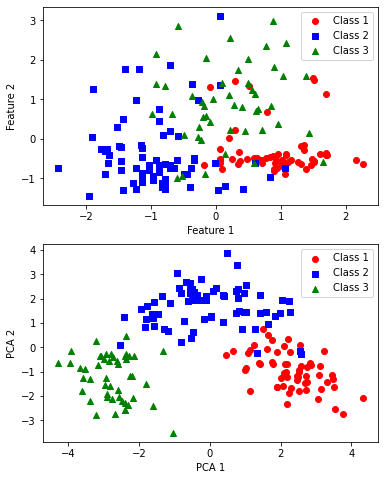

In [19]:
#standardize and plot data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = df.iloc[:,1:].values, df.iloc[:,0].values

sc = StandardScaler()
X= sc.fit_transform(X)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
fig, axs = plt.subplots(2,1,figsize=(6,8))

for l, c, m in zip(np.unique(y), colors, markers):
    axs[0].scatter(X[y==l, 0],X[y==l, 1],
            c=c, label=f'Class {l}', marker=m)

axs[0].set(xlabel='Feature 1',ylabel='Feature 2')
axs[0].legend()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for l, c, m in zip(np.unique(y), colors, markers):
    axs[1].scatter(X_pca[y==l, 0],X_pca[y==l, 1],
            c=c, label=f'Class {l}', marker=m)

axs[1].set(xlabel='PCA 1',ylabel='PCA 2')
axs[1].legend()

In [21]:
#Use original feature or PCAs to do classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#split data
X, y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1,stratify=y)

#standardize data
sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#logistic regression with the original data
lr = LogisticRegression(multi_class='ovr',
        random_state=1,
        solver='lbfgs')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]
acc=0.981


In [22]:
#logistic regression with 2 princial componenets
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(multi_class='ovr',
        random_state=1,
        solver='lbfgs')
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
acc=0.981


In [23]:
#logistic regression with 2 featrues of the original data
X_train=X_train_std[:,0:2]
X_test =X_test_std[:,0:2]

lr = LogisticRegression(multi_class='ovr',
        random_state=1,
        solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

[[16  0  2]
 [ 3 17  1]
 [ 4  4  7]]
acc=0.741
